In [2]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib
import networkx as nx

## Amsterdam

### Importing Useful Data

In [3]:
GEO_metadata = pd.read_csv('Amsterdam/data_storage/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')

In [3]:
metadata = pd.read_csv('Amsterdam/data_storage/metadata.csv', sep='\t', index_col='Unnamed: 0')

In [4]:
GEO_metadata.columns

Index(['y', 'x', 'street_count', 'bc', 'pr', 'dg', 'cl', 'highway', 'geometry',
       'index', 'index.1', 'candownload', 'url_c', 'url_q', 'url_n',
       'url_largest', 'owner', 'owner_loc', 'title', 'description', 'comments',
       'taken', 'views', 'people', 'tags', 'lat', 'lon', 'neighbourhood',
       'url', 'local', 'tag_list', 'tag_len', 'NOT', 'year', 'time', 'week',
       'unique_week', 'Dutch', 'English', 'Other_Lang', 'num_sent',
       'revised_text', 'text_data', 'text_len', 'GEO_node', 'posts_num'],
      dtype='object')

In [103]:
GEO_metadata

,y,x,street_count,bc,pr,dg,cl,highway,geometry,index,...,English,Other_Lang,num_sent,revised_text,text_data,text_len,GEO_node,posts_num,week_adjust,adjusted_week
0,52.358218,4.896208,3,0.000291,0.000179,0.000371,0.005275,NaN,POINT (4.8962081 52.3582184),2,...,1.0,0.0,2.0,"Amsterdam, the Netherlands.. It has tags of ci...","Amsterdam, the Netherlands.. It has title of C...",37.0,46327539,3,0,202206
1,52.377364,4.902717,3,0.000438,0.000093,0.000495,0.004710,NaN,POINT (4.9027169 52.377364),3,...,1.0,0.0,1.0,"It has tags of xt, rfo, station, amsterdam, wh...",...,9.0,1565648198,5,0,202206
2,52.372786,4.871513,4,0.028375,0.000162,0.000742,0.005248,NaN,POINT (4.8715127 52.3727864),8,...,1.0,0.0,2.0,There was a single swan in the water which see...,Shot from the bridge at the beginning of the B...,24.0,7038645211,1,0,201851
3,52.348138,4.917175,4,0.000000,0.000019,0.000247,0.000000,NaN,POINT (4.9171751 52.3481377),9,...,1.0,0.0,3.0,It has title of Ford Transit minibus 1978. Ams...,"Amsterdam, the Netherlands.. It has title of F...",51.0,46283525,2,0,202206
4,52.348138,4.917175,4,0.000000,0.000019,0.000247,0.000000,NaN,POINT (4.9171751 52.3481377),13,...,1.0,1.0,3.0,"It has tags of bt, renault, dauphine, renaultd...","Amsterdam, the Netherlands.. It has title of R...",44.0,46283525,2,0,202206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,52.359908,4.885016,3,0.000447,0.000158,0.000742,0.005992,NaN,POINT (4.885016 52.3599082),4993,...,1.0,1.0,5.0,Clearing out some archives. Rather liked this....,"Amsterdam, The Netherlands. Clearing out some ...",21.0,5659414206,54,0,201840
3723,52.372079,4.895869,3,0.003421,0.000128,0.000495,0.005137,NaN,POINT (4.8958692 52.3720793),4995,...,0.0,1.0,1.0,"It has tags of amsterdam, pont, d, digitalphotos",. It has title of AMSTERDAM. It has tags of am...,8.0,46388383,7,0,201723
3724,52.377201,4.916996,1,0.000000,0.000118,0.000247,0.003432,NaN,POINT (4.9169956 52.3772006),4996,...,NaN,NaN,NaN,NaN,NaN,NaN,2021794532,108,0,202131
3725,52.372949,4.916507,1,0.000000,0.000022,0.000247,0.003756,NaN,POINT (4.9165068 52.3729494),4997,...,NaN,NaN,NaN,NaN,NaN,NaN,3842783411,32,0,202131


In [81]:
GEO_nodes = pd.read_csv('Amsterdam/data_storage/GEO_nodes.csv', sep='\t').set_index('osmid')
GEO_nodes

,y,x,street_count,bc,pr,dg,cl,highway,geometry
osmid,,,,,,,,,
6316199,52.370173,4.888396,4,0.002586,0.000157,0.000742,0.005353,NaN,POINT (4.8883961 52.3701725)
1360288007,52.370276,4.888988,4,0.002159,0.000140,0.000742,0.005414,NaN,POINT (4.8889884 52.3702764)
46379627,52.370216,4.887774,4,0.002346,0.000111,0.000618,0.005249,NaN,POINT (4.8877742 52.3702155)
46389218,52.372186,4.888802,4,0.000474,0.000189,0.000618,0.005269,NaN,POINT (4.8888022 52.3721856)
25596477,52.367000,4.906097,3,0.000368,0.000255,0.000742,0.004793,NaN,POINT (4.9060967 52.367)
...,...,...,...,...,...,...,...,...,...
9360208870,52.374215,4.875016,4,0.006996,0.000055,0.000495,0.005425,NaN,POINT (4.8750162 52.3742147)
9447898761,52.364368,4.859590,3,0.000739,0.000119,0.000742,0.004256,NaN,POINT (4.8595904 52.364368)
9447898763,52.364542,4.859766,1,0.000000,0.000086,0.000247,0.004193,NaN,POINT (4.8597662 52.3645418)


In [7]:
def check_last_week(line):
    if line['week']>50:
        if line['taken'][5:7] == '01':
            return int(-100)
    return int(0)

In [8]:
GEO_metadata['week_adjust'] = GEO_metadata.apply(lambda x: check_last_week(x),axis=1)

In [9]:
metadata['week_adjust'] = metadata.apply(lambda x: check_last_week(x),axis=1)

In [10]:
GEO_metadata['adjusted_week'] = (GEO_metadata['unique_week'].astype(int) + GEO_metadata['week_adjust']).astype(str)

In [11]:
metadata['adjusted_week'] = (metadata['unique_week'].astype(int) + metadata['week_adjust']).astype(str)

In [12]:
metadata[metadata.week>50][['taken','unique_week','adjusted_week','week_adjust']]

,taken,unique_week,adjusted_week,week_adjust
8,2018-12-18 19:49:21,201851,201851,0
54,2021-12-21 17:35:00,202151,202151,0
317,2022-01-02 17:03:51,202252,202152,-100
319,2021-12-25 18:00:22,202151,202151,0
376,2021-12-29 12:07:57,202152,202152,0
401,2021-12-29 12:07:15,202152,202152,0
446,2022-01-01 19:18:57,202252,202152,-100
447,2021-12-28 18:53:00,202152,202152,0
448,2021-12-28 20:16:36,202152,202152,0
466,2021-12-30 15:51:36,202152,202152,0


In [13]:
GEO_metadata.to_csv('Amsterdam/data_storage/GEO_metadata.csv', sep='\t')

In [14]:
metadata.to_csv('Amsterdam/data_storage/metadata.csv', sep='\t')

In [23]:
social_links = pd.read_csv('Amsterdam/data_storage/social_links.csv', sep='\t').rename(columns={'Unnamed: 0': 'User0', 
                                                                                              'Unnamed: 1': 'User1'})

In [24]:
social_links

,User0,User1,self,friend,interest,mutual
0,8733637@N04,8733637@N04,1,1,1.000000,True
1,8733637@N04,150614452@N05,0,False,0.015219,False
2,8733637@N04,195032295@N04,0,False,0.000000,False
3,8733637@N04,10299779@N03,0,False,0.004032,False
4,8733637@N04,72605979@N00,0,False,0.000000,False
...,...,...,...,...,...,...
38020,193393816@N06,20395737@N02,0,False,0.000000,False
38021,193393816@N06,7243324@N03,0,False,0.000000,False
38022,193393816@N06,7132768@N03,0,False,0.000000,False
38023,193393816@N06,78239672@N00,0,False,0.000000,False


In [39]:
GEO_node_dist = pd.read_csv('Amsterdam/data_storage/GEO_node_dist.csv', sep='\t', index_col='Unnamed: 0')

In [40]:
GEO_node_dist

,46327539,1565648198,7038645211,46283525,2308965805,3176834583,46398491,46400893,3177151769,725239288,...,4571013953,1829879233,46385917,46398857,46397025,46292204,46387771,3274830379,46363905,46364719
46327539,0.0,251.8,227.3,200.8,245.0,196.0,209.2,231.8,138.6,185.2,...,56.3,238.9,198.2,208.8,236.0,217.5,203.6,52.6,139.8,149.4
1565648198,230.3,0.0,202.4,300.8,24.3,80.2,80.8,51.9,113.2,108.8,...,224.4,42.7,95.8,77.1,65.2,369.4,87.8,220.7,159.9,135.8
7038645211,216.2,200.5,0.0,382.8,193.7,125.6,129.3,180.5,184.7,198.0,...,195.0,178.6,167.5,137.2,184.8,233.1,132.6,191.3,231.4,260.4
46283525,inf,inf,inf,0.0,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2308965805,239.0,12.0,211.1,309.5,0.0,88.9,89.5,60.6,121.9,117.5,...,233.1,51.4,104.5,85.8,73.9,378.1,96.5,229.4,168.6,144.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46292204,239.1,390.9,241.3,302.7,384.1,307.1,319.7,370.9,281.3,327.9,...,191.1,370.0,339.4,327.6,375.2,0.0,312.5,186.0,322.3,316.9
46387771,187.4,96.4,151.6,313.9,89.6,29.4,42.6,76.4,70.3,86.5,...,181.5,83.5,56.0,46.3,80.7,292.2,0.0,177.8,117.0,148.9
3274830379,58.7,224.4,188.3,197.5,217.6,168.6,181.8,204.4,111.2,157.8,...,6.3,211.5,170.8,181.4,208.6,166.3,176.2,0.0,152.2,167.3
46363905,132.6,148.9,230.2,219.2,157.0,108.0,121.2,143.8,50.6,90.9,...,154.4,150.9,110.2,120.8,148.0,311.9,115.6,150.7,0.0,40.5


### Preparing a DataFrame to Contain the MultiGraph Infomation

In [27]:
All_Edges = pd.DataFrame([(a,b) for a in list(GEO_metadata['index.1']) for b in list(GEO_metadata['index.1']) if not a==b])
All_Edges

,0,1
0,51885929339,51884357517
1,51885929339,51883860957
2,51885929339,51884423594
3,51885929339,51882154188
4,51885929339,51882079916
...,...,...
13886797,51368197299,51364735153
13886798,51368197299,51361633644
13886799,51368197299,51357996868
13886800,51368197299,51356750697


### Temporal Graph
If two posts are consequent in a time flow, connects them with a temporal link

<AxesSubplot:>

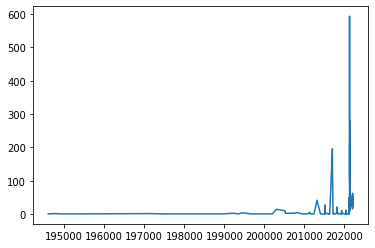

In [28]:
week_count = GEO_metadata['adjusted_week'].value_counts().sort_index()
week_count.plot()

In [29]:
temp_dict = {}
for i in range(len(week_count)):
    for j in range(len(week_count)):
        temp_dict[(week_count.index[i],week_count.index[j])] = abs(j-i)

In [30]:
temp_df = pd.DataFrame(temp_dict, ['dist']).T

In [104]:
temp_df

dist
194601 194601     0
       194734     1
       194932     2
       194941     3
       195026     4
...             ...
202207 202203     4
       202204     3
       202205     2
       202206     1
       202207     0

[21316 rows x 1 columns]

In [105]:
GEO_metadata['adjusted_week']

0       202206
1       202206
2       201851
3       202206
4       202206
         ...  
3722    201840
3723    201723
3724    202131
3725    202131
3726    202131
Name: adjusted_week, Length: 3727, dtype: int64

In [32]:
All_Edges['Week_0'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[0]].reset_index()['adjusted_week']
All_Edges['Week_1'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[1]].reset_index()['adjusted_week']

In [33]:
All_Edges = All_Edges.merge(temp_df, how='left', left_on=['Week_0','Week_1'], right_index=True)

In [106]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance,Spatial_Similarity,One_Edge,Same_Node
0,51885929339,51884357517,202206,202206,0,1.0,8733637@N04,150614452@N05,0,0.0,46327539,1565648198,241.05,0.0,True,False
1,51885929339,51883860957,202206,201851,78,0.0,8733637@N04,195032295@N04,0,0.0,46327539,7038645211,221.75,0.0,False,False
2,51885929339,51884423594,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0,46327539,46283525,inf,NaN,False,False
3,51885929339,51882154188,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0,46327539,46283525,inf,NaN,False,False
4,51885929339,51882079916,202206,202150,8,0.0,8733637@N04,10299779@N03,0,0.0,46327539,2308965805,242.00,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13886797,51368197299,51364735153,202131,202131,0,1.0,107735426@N07,10024035@N00,0,0.0,6757261126,6051158012,inf,NaN,False,False
13886798,51368197299,51361633644,202131,201840,55,0.0,107735426@N07,78239672@N00,0,0.0,6757261126,5659414206,inf,NaN,False,False
13886799,51368197299,51357996868,202131,201723,65,0.0,107735426@N07,193393816@N06,0,0.0,6757261126,46388383,inf,NaN,False,False
13886800,51368197299,51356750697,202131,202131,0,1.0,107735426@N07,34476863@N00,0,0.0,6757261126,2021794532,inf,NaN,False,False


In [35]:
All_Edges['Temporal_Similarity'] = abs((2-All_Edges['dist'])/2*(All_Edges['dist']<2))

In [108]:
All_Edges['Temporal_Similarity'].value_counts()

0.0    12501124
1.0      781146
0.5      604532
Name: Temporal_Similarity, dtype: int64

In [37]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity
0,51885929339,51884357517,202206,202206,0,1.0
1,51885929339,51883860957,202206,201851,78,0.0
2,51885929339,51884423594,202206,202206,0,1.0
3,51885929339,51882154188,202206,202206,0,1.0
4,51885929339,51882079916,202206,202150,8,0.0
...,...,...,...,...,...,...
13886797,51368197299,51364735153,202131,202131,0,1.0
13886798,51368197299,51361633644,202131,201840,55,0.0
13886799,51368197299,51357996868,202131,201723,65,0.0
13886800,51368197299,51356750697,202131,202131,0,1.0


In [109]:
(All_Edges['Temporal_Similarity']>0).sum()

1385678

In [110]:
(All_Edges['Temporal_Similarity']==1).sum()

781146

### Social Graph

In [40]:
social_links

,User0,User1,self,friend,interest,mutual
0,8733637@N04,8733637@N04,1,1,1.000000,True
1,8733637@N04,150614452@N05,0,False,0.015219,False
2,8733637@N04,195032295@N04,0,False,0.000000,False
3,8733637@N04,10299779@N03,0,False,0.004032,False
4,8733637@N04,72605979@N00,0,False,0.000000,False
...,...,...,...,...,...,...
38020,193393816@N06,20395737@N02,0,False,0.000000,False
38021,193393816@N06,7243324@N03,0,False,0.000000,False
38022,193393816@N06,7132768@N03,0,False,0.000000,False
38023,193393816@N06,78239672@N00,0,False,0.000000,False


C:\Users\zzbn1\AppData\Local\Temp\ipykernel_48228\2726203132.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)


<AxesSubplot:>

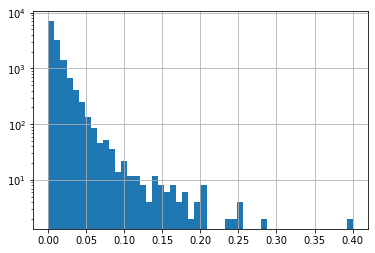

In [41]:
social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)

In [42]:
(social_links['interest']>0.05).sum()

649

In [43]:
social_links['relationship'] = ((social_links['self'].astype(int)*2 + (social_links['friend']=='True').astype(int) + (social_links['interest']>0.05).astype(int))).astype(int)

In [44]:
social_links['relationship'].value_counts()

0    37078
1      596
3      195
2      156
Name: relationship, dtype: int64

In [45]:
social_links

,User0,User1,self,friend,interest,mutual,relationship
0,8733637@N04,8733637@N04,1,1,1.000000,True,3
1,8733637@N04,150614452@N05,0,False,0.015219,False,0
2,8733637@N04,195032295@N04,0,False,0.000000,False,0
3,8733637@N04,10299779@N03,0,False,0.004032,False,0
4,8733637@N04,72605979@N00,0,False,0.000000,False,0
...,...,...,...,...,...,...,...
38020,193393816@N06,20395737@N02,0,False,0.000000,False,0
38021,193393816@N06,7243324@N03,0,False,0.000000,False,0
38022,193393816@N06,7132768@N03,0,False,0.000000,False,0
38023,193393816@N06,78239672@N00,0,False,0.000000,False,0


In [46]:
H0 = nx.from_pandas_edgelist(social_links[social_links.relationship>0], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

In [47]:
H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_48228\454995413.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1',


In [48]:
len(H0.nodes)

195

In [49]:
len(H1.nodes)

119

In [50]:
len(H0.edges)

571

In [51]:
len(H1.edges)

376

In [52]:
nx.is_connected(H0)

False

In [53]:
nx.is_connected(H1)

False

In [54]:
nx.number_connected_components(H0)

78

In [55]:
nx.number_connected_components(H1)

2

In [56]:
nx.density(H0)

0.030187681734073487

In [57]:
nx.density(H1)

0.05355362483976642

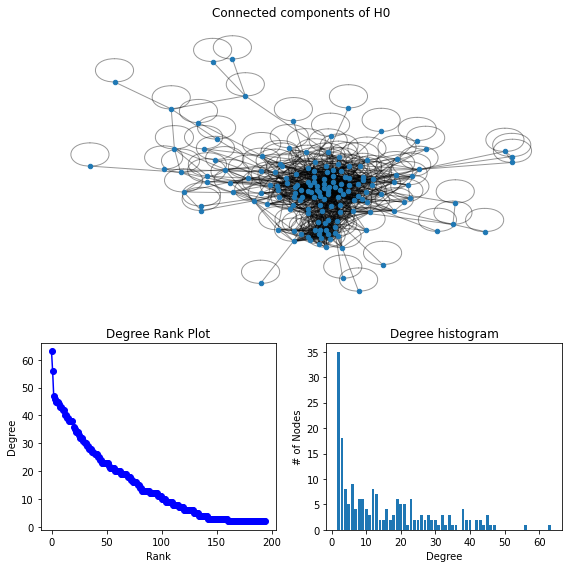

In [86]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H0.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H0.subgraph(sorted(nx.connected_components(H0), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of H0")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [41]:
size = [GEO_metadata.groupby('owner').count()['x'].loc[v] for v in H1]

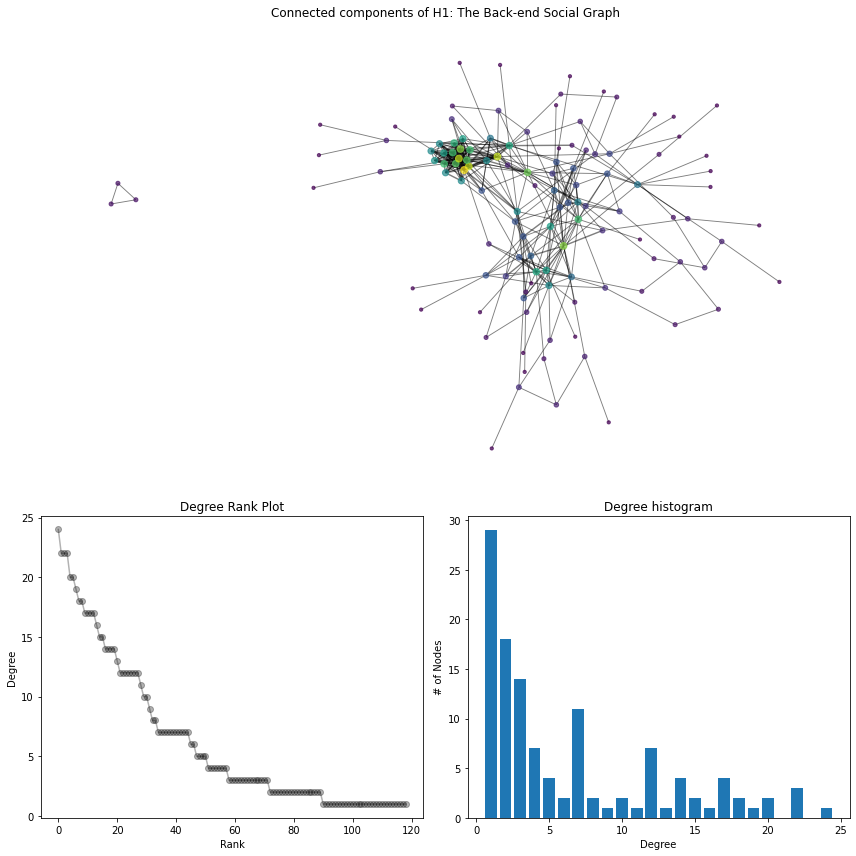

In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.5, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("Connected components of H1: The Back-end Social Graph")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

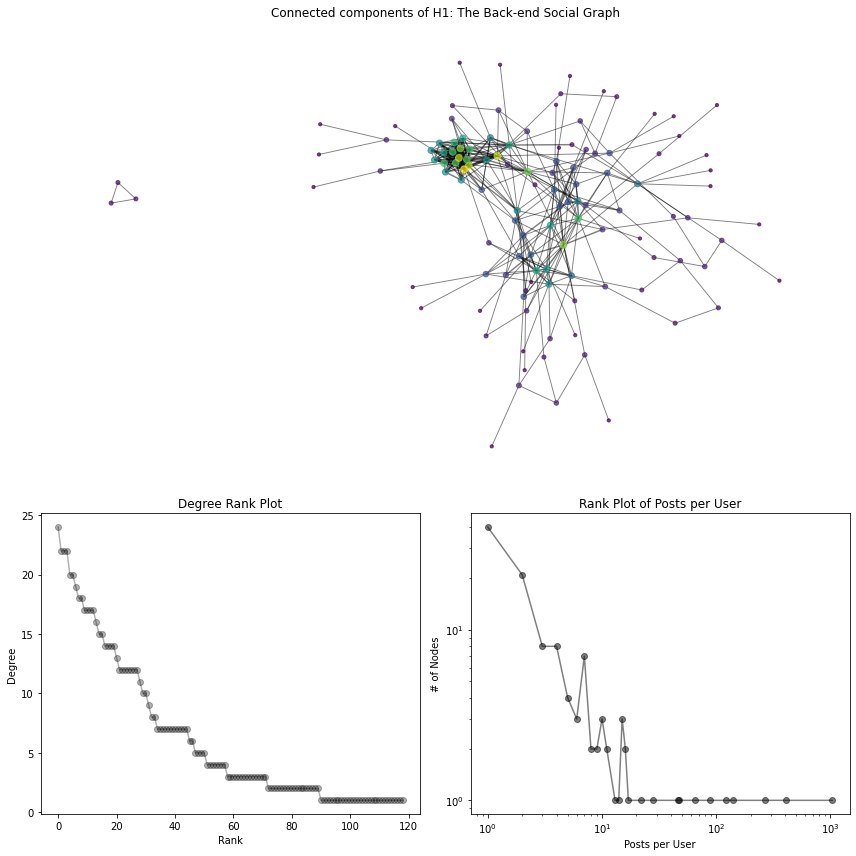

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.5, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("Connected components of H1: The Back-end Social Graph")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(*np.unique(size, return_counts=True),"k-", alpha=0.5,marker="o")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per User")
ax2.set_xlabel("Posts per User")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

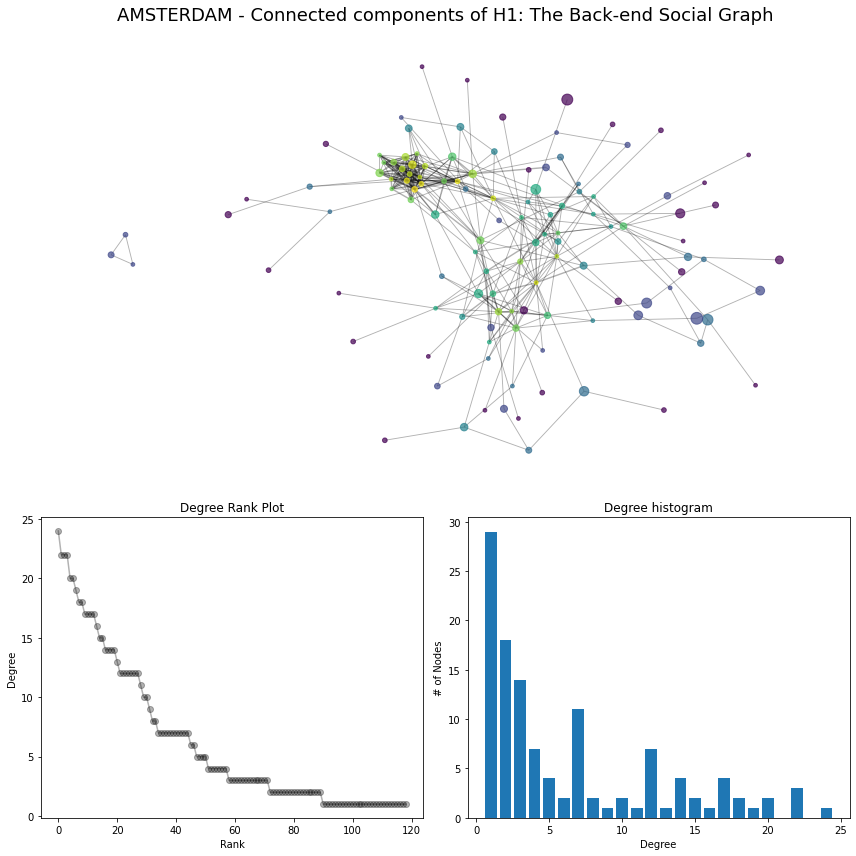

In [89]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.2, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of H1: The Back-end Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

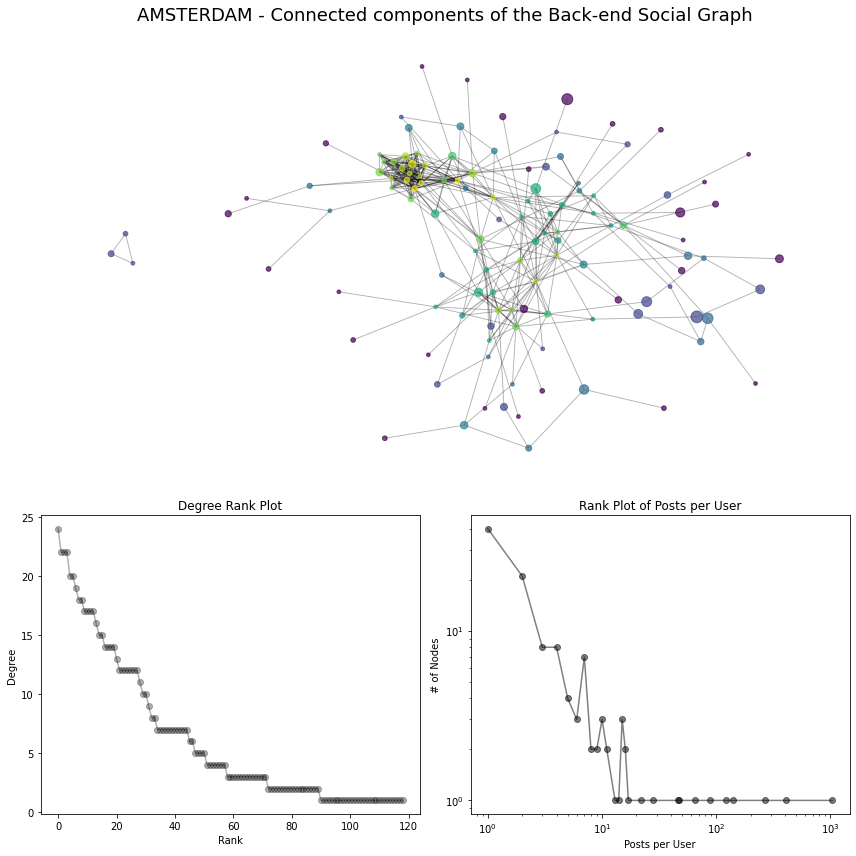

In [43]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.2, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of the Back-end Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(*np.unique(size, return_counts=True),"k-", alpha=0.5,marker="o")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per User")
ax2.set_xlabel("Posts per User")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


average shortest path length 3.2925089179548155

length #paths
0 116
1 746
2 2400
3 4344
4 3872
5 1652
6 304
7 22
radius: 4
diameter: 7
center: ['131021490@N02', '69663264@N03', '29780762@N07', '138004730@N03', '61028407@N05']
periphery: ['193496828@N05', '42152648@N06', '40165750@N06', '185035056@N05', '8126893@N02', '26637609@N00', '193874466@N08', '163714109@N03']
density: 0.05592203898050974


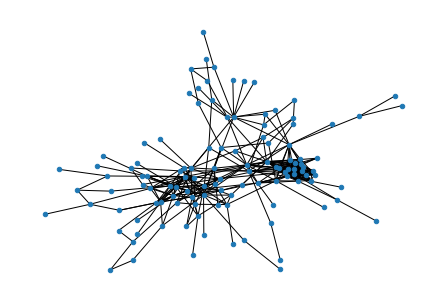

In [90]:
G=H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [58]:
social_links[['User0','User1','relationship']]

,User0,User1,relationship
0,8733637@N04,8733637@N04,3
1,8733637@N04,150614452@N05,0
2,8733637@N04,195032295@N04,0
3,8733637@N04,10299779@N03,0
4,8733637@N04,72605979@N00,0
...,...,...,...
38020,193393816@N06,20395737@N02,0
38021,193393816@N06,7243324@N03,0
38022,193393816@N06,7132768@N03,0
38023,193393816@N06,78239672@N00,0


In [59]:
All_Edges['User_0'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[0]].reset_index()['owner']
All_Edges['User_1'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[1]].reset_index()['owner']

In [60]:
All_Edges = All_Edges.merge(social_links[['User0','User1','relationship']], how='left', 
                                                 left_on=['User_0','User_1'], right_on = ['User0','User1'])

In [61]:
All_Edges = All_Edges.drop(['User0','User1'],axis=1)

In [62]:
All_Edges['Social_Similarity'] = All_Edges['relationship']/3

In [63]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity
0,51885929339,51884357517,202206,202206,0,1.0,8733637@N04,150614452@N05,0,0.0
1,51885929339,51883860957,202206,201851,78,0.0,8733637@N04,195032295@N04,0,0.0
2,51885929339,51884423594,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0
3,51885929339,51882154188,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0
4,51885929339,51882079916,202206,202150,8,0.0,8733637@N04,10299779@N03,0,0.0
...,...,...,...,...,...,...,...,...,...,...
13886797,51368197299,51364735153,202131,202131,0,1.0,107735426@N07,10024035@N00,0,0.0
13886798,51368197299,51361633644,202131,201840,55,0.0,107735426@N07,78239672@N00,0,0.0
13886799,51368197299,51357996868,202131,201723,65,0.0,107735426@N07,193393816@N06,0,0.0
13886800,51368197299,51356750697,202131,202131,0,1.0,107735426@N07,34476863@N00,0,0.0


In [64]:
(All_Edges['Social_Similarity']!=0).sum()

1755168

In [65]:
(All_Edges['Social_Similarity']==1).sum()

1522232

### Spatial Graph

In [66]:
All_Edges['GEO_0'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[0]].reset_index()['GEO_node']
All_Edges['GEO_1'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[1]].reset_index()['GEO_node']

In [67]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1
0,51885929339,51884357517,202206,202206,0,1.0,8733637@N04,150614452@N05,0,0.0,46327539,1565648198
1,51885929339,51883860957,202206,201851,78,0.0,8733637@N04,195032295@N04,0,0.0,46327539,7038645211
2,51885929339,51884423594,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0,46327539,46283525
3,51885929339,51882154188,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0,46327539,46283525
4,51885929339,51882079916,202206,202150,8,0.0,8733637@N04,10299779@N03,0,0.0,46327539,2308965805
...,...,...,...,...,...,...,...,...,...,...,...,...
13886797,51368197299,51364735153,202131,202131,0,1.0,107735426@N07,10024035@N00,0,0.0,6757261126,6051158012
13886798,51368197299,51361633644,202131,201840,55,0.0,107735426@N07,78239672@N00,0,0.0,6757261126,5659414206
13886799,51368197299,51357996868,202131,201723,65,0.0,107735426@N07,193393816@N06,0,0.0,6757261126,46388383
13886800,51368197299,51356750697,202131,202131,0,1.0,107735426@N07,34476863@N00,0,0.0,6757261126,2021794532


In [41]:
GEO_dict = {}
for i in GEO_node_dist.index:
    for j in GEO_node_dist.index:
        GEO_dict[(i,j)] = (GEO_node_dist[str(i)][j] + GEO_node_dist[str(j)][i])/2

In [42]:
GEO_df = pd.DataFrame(GEO_dict, ['geo_distance']).T

In [51]:
len(GEO_df.reset_index()['level_1'].unique())

945

In [52]:
945-788

157

<AxesSubplot:>

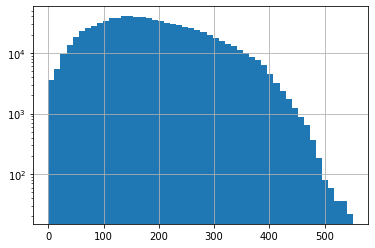

In [71]:
GEO_df[GEO_df['geo_distance']<50000]['geo_distance'].hist(log=True, bins=50)

In [72]:
GEO_df['geo_distance'].quantile(0.02)

32.5

In [73]:
(GEO_df['geo_distance']<20).sum()

7607

In [74]:
H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(), 
                             source='level_0', target='level_1', edge_attr=['geo_distance'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_48228\1381867291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(),


In [75]:
len(H2.nodes)

788

In [76]:
len(H2.edges)

3331

In [77]:
nx.is_connected(H2)

False

In [78]:
nx.number_connected_components(H2)

72

In [79]:
nx.density(H2)

0.010742458349189559

In [82]:
GEO_nodes

,y,x,street_count,bc,pr,dg,cl,highway,geometry
osmid,,,,,,,,,
6316199,52.370173,4.888396,4,0.002586,0.000157,0.000742,0.005353,NaN,POINT (4.8883961 52.3701725)
1360288007,52.370276,4.888988,4,0.002159,0.000140,0.000742,0.005414,NaN,POINT (4.8889884 52.3702764)
46379627,52.370216,4.887774,4,0.002346,0.000111,0.000618,0.005249,NaN,POINT (4.8877742 52.3702155)
46389218,52.372186,4.888802,4,0.000474,0.000189,0.000618,0.005269,NaN,POINT (4.8888022 52.3721856)
25596477,52.367000,4.906097,3,0.000368,0.000255,0.000742,0.004793,NaN,POINT (4.9060967 52.367)
...,...,...,...,...,...,...,...,...,...
9360208870,52.374215,4.875016,4,0.006996,0.000055,0.000495,0.005425,NaN,POINT (4.8750162 52.3742147)
9447898761,52.364368,4.859590,3,0.000739,0.000119,0.000742,0.004256,NaN,POINT (4.8595904 52.364368)
9447898763,52.364542,4.859766,1,0.000000,0.000086,0.000247,0.004193,NaN,POINT (4.8597662 52.3645418)


In [83]:
GEO_metadata['GEO_node']

0         46327539
1       1565648198
2       7038645211
3         46283525
4         46283525
           ...    
3722    5659414206
3723      46388383
3724    2021794532
3725    3842783411
3726    6757261126
Name: GEO_node, Length: 3727, dtype: int64

In [84]:
size = [GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2]

In [85]:
len(size)

788

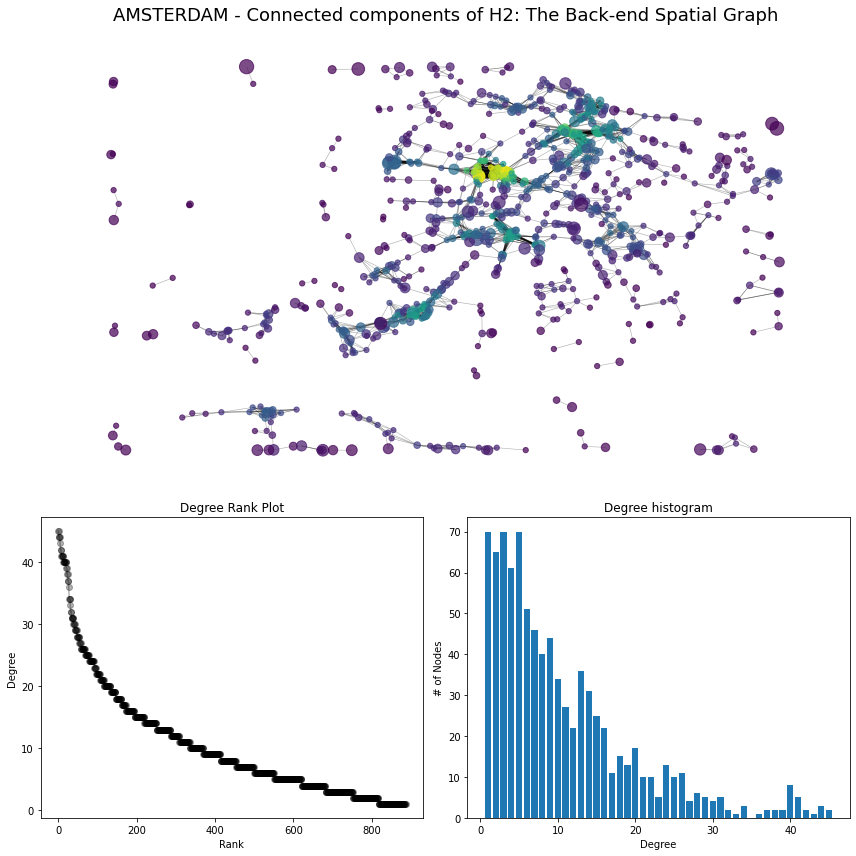

In [131]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
Gcc = H2
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H2}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=np.log(np.array(size)+1)*40, 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of H2: The Back-end Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [87]:
size_p = -np.array(size)
size_p.sort()
size_p = -size_p

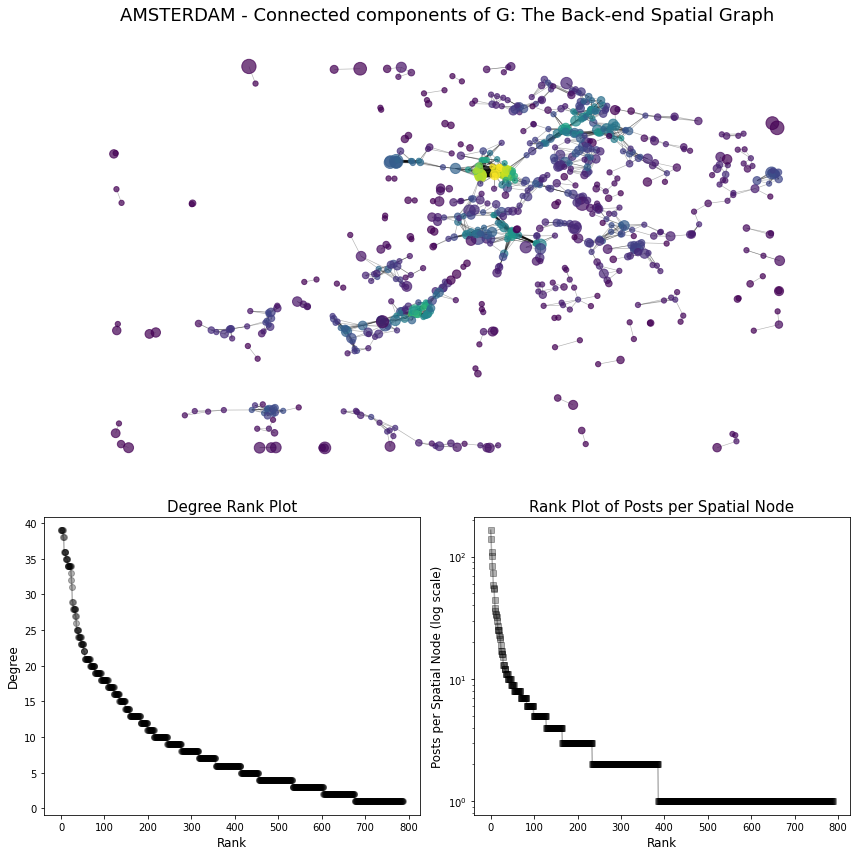

In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
Gcc = H2
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H2}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=np.log(np.array(size)+1)*40, 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of G: The Back-end Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot",size=15)
ax1.set_ylabel("Degree",size=12)
ax1.set_xlabel("Rank",size=12)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(size_p, "k-", alpha=0.3, marker="s")
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per Spatial Node",size=15)
ax2.set_xlabel("Rank",size=12)
ax2.set_ylabel("Posts per Spatial Node (log scale)",size=12)

fig.tight_layout()
plt.show()


average shortest path length 9.91151384083045

length #paths
0 680
1 8562
2 14078
3 19376
4 25204
5 29284
6 31716
7 34812
8 36746
9 35496
10 32850
11 31166
12 29060
13 26078
14 21296
15 17966
16 15600
17 12410
18 10118
19 8336
20 6612
21 5348
22 4092
23 2680
24 1630
25 864
26 296
27 42
28 2
radius: 14
diameter: 28
center: [46375177]
periphery: [8127265419, 5416885003]
density: 0.018543706142250715


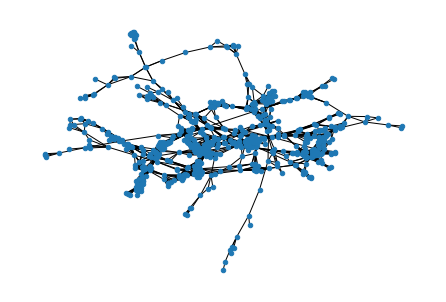

In [132]:
G=H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [89]:
All_Edges = All_Edges.merge(GEO_df, how='left', left_on=['GEO_0','GEO_1'], right_index=True)

In [90]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance
0,51885929339,51884357517,202206,202206,0,1.0,8733637@N04,150614452@N05,0,0.0,46327539,1565648198,241.05
1,51885929339,51883860957,202206,201851,78,0.0,8733637@N04,195032295@N04,0,0.0,46327539,7038645211,221.75
2,51885929339,51884423594,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0,46327539,46283525,inf
3,51885929339,51882154188,202206,202206,0,1.0,8733637@N04,8733637@N04,3,1.0,46327539,46283525,inf
4,51885929339,51882079916,202206,202150,8,0.0,8733637@N04,10299779@N03,0,0.0,46327539,2308965805,242.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13886797,51368197299,51364735153,202131,202131,0,1.0,107735426@N07,10024035@N00,0,0.0,6757261126,6051158012,inf
13886798,51368197299,51361633644,202131,201840,55,0.0,107735426@N07,78239672@N00,0,0.0,6757261126,5659414206,inf
13886799,51368197299,51357996868,202131,201723,65,0.0,107735426@N07,193393816@N06,0,0.0,6757261126,46388383,inf
13886800,51368197299,51356750697,202131,202131,0,1.0,107735426@N07,34476863@N00,0,0.0,6757261126,2021794532,inf


<AxesSubplot:>

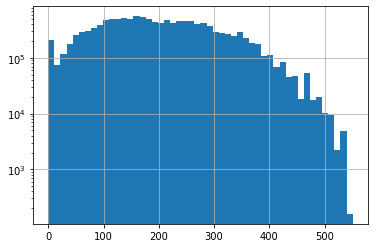

In [91]:
All_Edges[All_Edges.geo_distance<50000]['geo_distance'].hist(log=True, bins=50)

In [135]:
All_Edges['Spatial_Similarity'] = (abs((20-All_Edges['geo_distance'])/20) * (All_Edges['geo_distance']<=20)).fillna(0)

In [137]:
All_Edges['One_Edge'] = (All_Edges['Spatial_Similarity']+All_Edges['Social_Similarity']+All_Edges['Temporal_Similarity'])>0

In [136]:
All_Edges['Spatial_Similarity']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
13886797    0.0
13886798    0.0
13886799    0.0
13886800    0.0
13886801    0.0
Name: Spatial_Similarity, Length: 13886802, dtype: float64

In [138]:
All_Edges['Same_Node'] = All_Edges[0]==All_Edges[1]

In [139]:
All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_48228\3347584611.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]


In [140]:
(All_Edges_Graph['Spatial_Similarity']!=0).sum()

270158

In [141]:
(All_Edges_Graph['Spatial_Similarity']==1).sum()

123630

In [142]:
All_Edges_Graph.to_csv('Amsterdam/data_storage/Edge_List.csv', sep='\t')

In [4]:
All_Edges_Graph = pd.read_csv('Amsterdam/data_storage/Edge_List.csv', sep='\t', index_col='Unnamed: 0')

### Construction and Analysis on Graphs

In [143]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0][[0,1,'Temporal_Similarity','Week_0','Week_1']], 
                             source=0, target=1,edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [5]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0].loc[:,['0','1','Temporal_Similarity','Week_0','Week_1']], 
                             source='0', target='1',edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [6]:
len(G1.nodes)

3727

In [7]:
len(G1.edges)

692839

In [146]:
nx.is_connected(G1)

True

In [147]:
nx.density(G1)

0.09978380911602254

In [88]:
pos_1 = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}

In [148]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0][[0,1,'Social_Similarity','User_0','User_1','relationship']], 
                             source=0, target=1,edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [8]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0].loc[:,['0','1','Social_Similarity','User_0','User_1','relationship']], 
                             source='0', target='1',edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [38]:
len(All_Edges_Graph['GEO_0'].unique())

945

In [9]:
len(G2.nodes)

3696

In [150]:
len(G2.edges)

877584

In [151]:
nx.is_connected(G2)

False

In [152]:
nx.number_connected_components(G2)

47

In [20]:
[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]

[2694,
 343,
 107,
 106,
 64,
 64,
 47,
 41,
 22,
 17,
 16,
 15,
 13,
 13,
 12,
 9,
 8,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [15]:
nx.connected_components(G2)

<generator object connected_components at 0x000001A0BDFEEC10>

In [153]:
nx.density(G2)

0.12852046465036993

In [154]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0][[0,1,'Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source=0, target=1,edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [10]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0].loc[:,['0','1','Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source='0', target='1',edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [73]:
len(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0]['GEO_0'].unique())

850

In [74]:
dif_set = set(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity==0]['GEO_0'].unique()).difference(set(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0]['GEO_0'].unique()))

In [75]:
len(dif_set)

95

In [77]:
dif_set

{26585460,
 46285051,
 46293814,
 46294496,
 46296112,
 46299720,
 46301499,
 46308820,
 46311973,
 46315547,
 46316724,
 46319484,
 46319842,
 46345045,
 46346264,
 46356705,
 46360568,
 46361179,
 46365598,
 46372325,
 46374668,
 46376939,
 46380737,
 46382415,
 46385233,
 46385942,
 46388632,
 46389399,
 46394761,
 46396601,
 46399465,
 46404331,
 46404439,
 46407158,
 46409619,
 46410770,
 46413078,
 46415975,
 46419384,
 46421768,
 46422220,
 46429483,
 46429524,
 46436689,
 103067886,
 248665511,
 267422325,
 272491677,
 370884348,
 452388595,
 675885568,
 1024689043,
 1069320431,
 1069444667,
 1341194979,
 1360312951,
 1470873949,
 1531069660,
 1581163157,
 1782385414,
 1977789557,
 2300344136,
 2365431957,
 2415790378,
 2467872032,
 2673849010,
 2991532594,
 3177724762,
 3185290437,
 3376816361,
 4239315090,
 4239316299,
 4393386230,
 4423002054,
 4560681015,
 4585190498,
 4885479138,
 4966813734,
 5120504848,
 5629072550,
 5629072605,
 5799322123,
 5799682710,
 6659252461,
 70

In [81]:
All_Edges_Graph[All_Edges_Graph.GEO_0==26585460]

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance,Spatial_Similarity,One_Edge,Same_Node
4869926,51381809032,51877725911,202127,202151,24,0.0,64749543@N02,64749543@N02,3,1.0,26585460,46350271,265.55,0.0,True,False
4870647,51381809032,51618222547,202127,202133,6,0.0,64749543@N02,64749543@N02,3,1.0,26585460,46301499,257.00,0.0,True,False
4871180,51381809032,51383582810,202127,202127,0,1.0,64749543@N02,64749543@N02,3,1.0,26585460,46422220,69.20,0.0,True,False
4871189,51381809032,51382569376,202127,202127,0,1.0,64749543@N02,64749543@N02,3,1.0,26585460,46421292,56.80,0.0,True,False
4871292,51381809032,51359237568,202127,202127,0,1.0,64749543@N02,57128711@N00,0,0.0,26585460,2039792609,278.20,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873273,51381809032,51619706544,202127,202133,6,0.0,64749543@N02,64749543@N02,3,1.0,26585460,3930509684,164.20,0.0,True,False
4873274,51381809032,51619283698,202127,202133,6,0.0,64749543@N02,64749543@N02,3,1.0,26585460,1360312951,217.70,0.0,True,False
4873275,51381809032,51618222187,202127,202133,6,0.0,64749543@N02,64749543@N02,3,1.0,26585460,46419384,159.10,0.0,True,False
4873427,51381809032,51386701566,202127,202128,1,0.5,64749543@N02,154141673@N06,0,0.0,26585460,1976785589,283.35,0.0,True,False


In [11]:
len(G3.nodes)

3632

In [12]:
len(G3.edges)

135079

In [157]:
nx.is_connected(G3)

False

In [158]:
nx.number_connected_components(G3)

134

In [32]:
[len(c) for c in sorted(nx.connected_components(G3), key=len, reverse=True)]

[1485,
 309,
 193,
 167,
 165,
 94,
 69,
 68,
 66,
 59,
 55,
 50,
 43,
 40,
 37,
 36,
 35,
 29,
 29,
 24,
 20,
 18,
 18,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 11,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [159]:
nx.density(G3)

0.020485461099174145

In [160]:
G = nx.MultiGraph()

In [161]:
G = nx.compose(nx.compose(G1,G2),G3)

In [162]:
len(G.nodes)

3727

In [163]:
len(G.edges)

1271171

In [164]:
nx.is_connected(G)

True

In [165]:
nx.density(G)

0.18307613228733297

In [169]:
pos = nx.spring_layout(G, seed=10396953, k=1)

In [170]:
len(pos)

3727

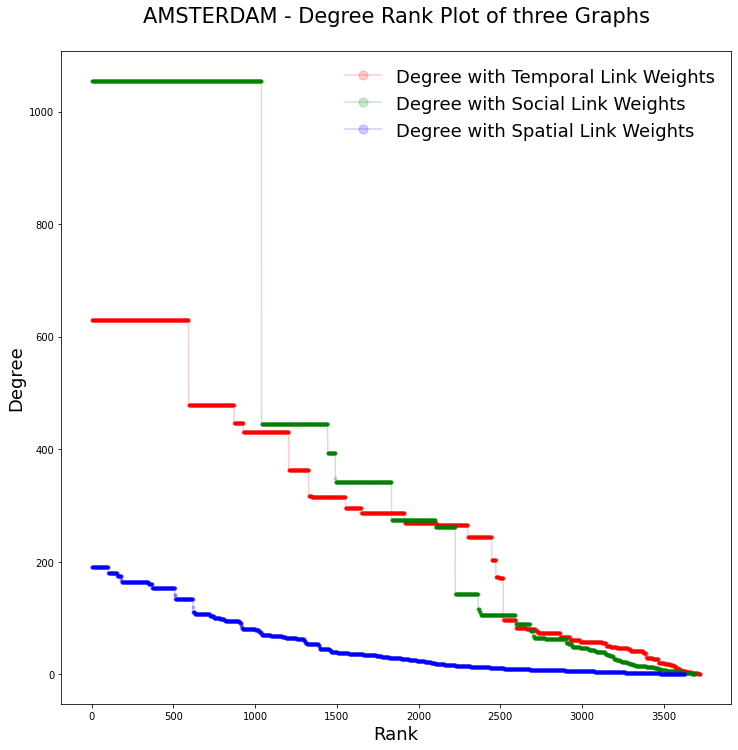

In [166]:
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Link Weights')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Link Weights')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Link Weights')

ax.set_title("AMSTERDAM - Degree Rank Plot of three Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

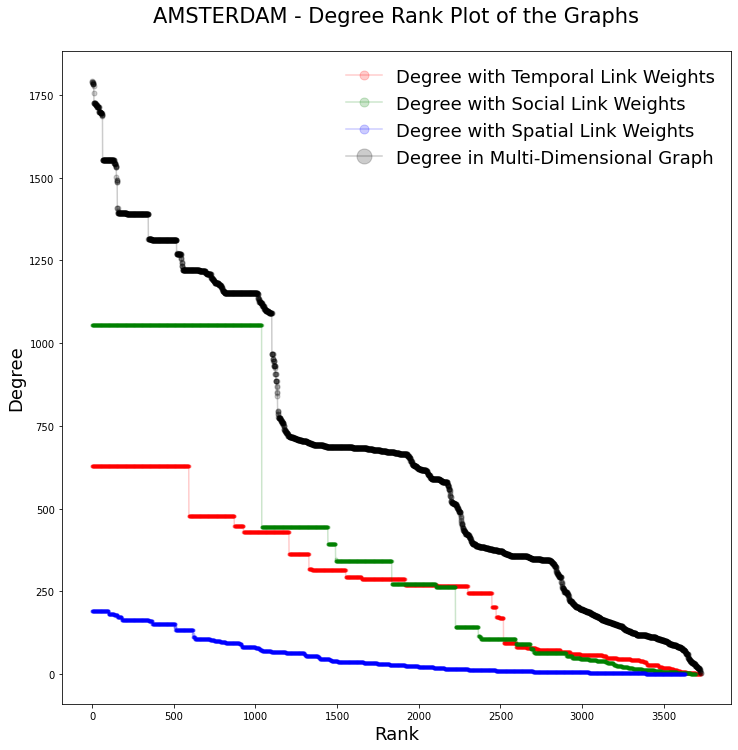

In [167]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Link Weights')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Link Weights')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Link Weights')
plt.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=5, label='Degree in Multi-Dimensional Graph')

ax.set_title("AMSTERDAM - Degree Rank Plot of the Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

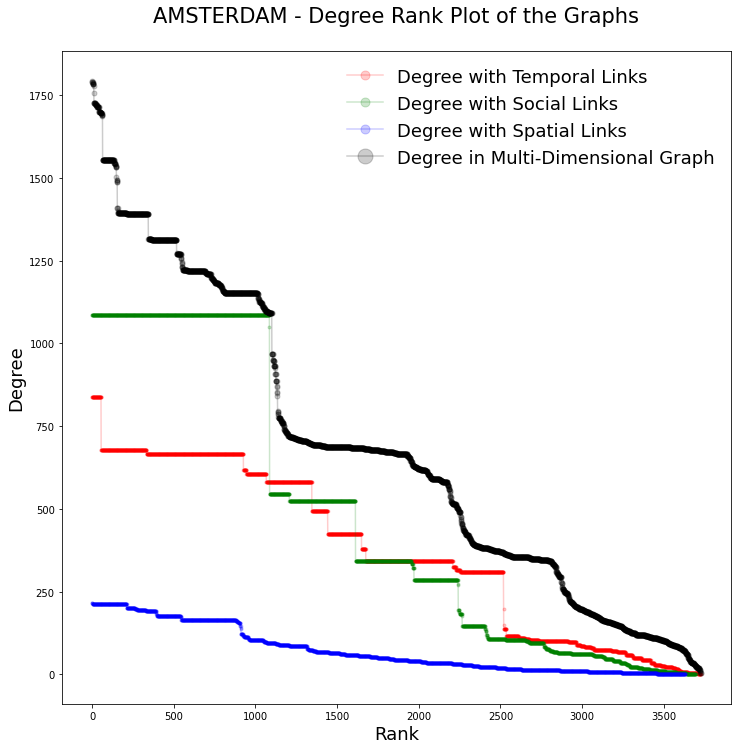

In [168]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree()), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree()), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree()), reverse=True)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Links')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Links')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Links')
plt.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=5, label='Degree in Multi-Dimensional Graph')

ax.set_title("AMSTERDAM - Degree Rank Plot of the Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

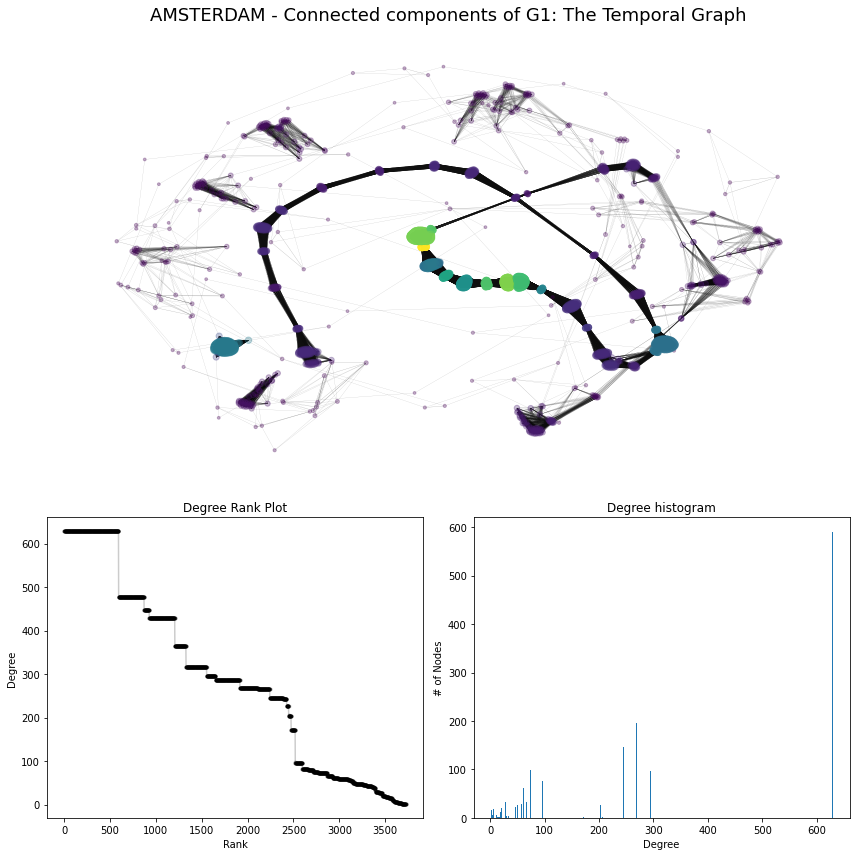

In [171]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
Gcc = G1
pos_2 = nx.spring_layout(G1, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Temporal_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of G1: The Temporal Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

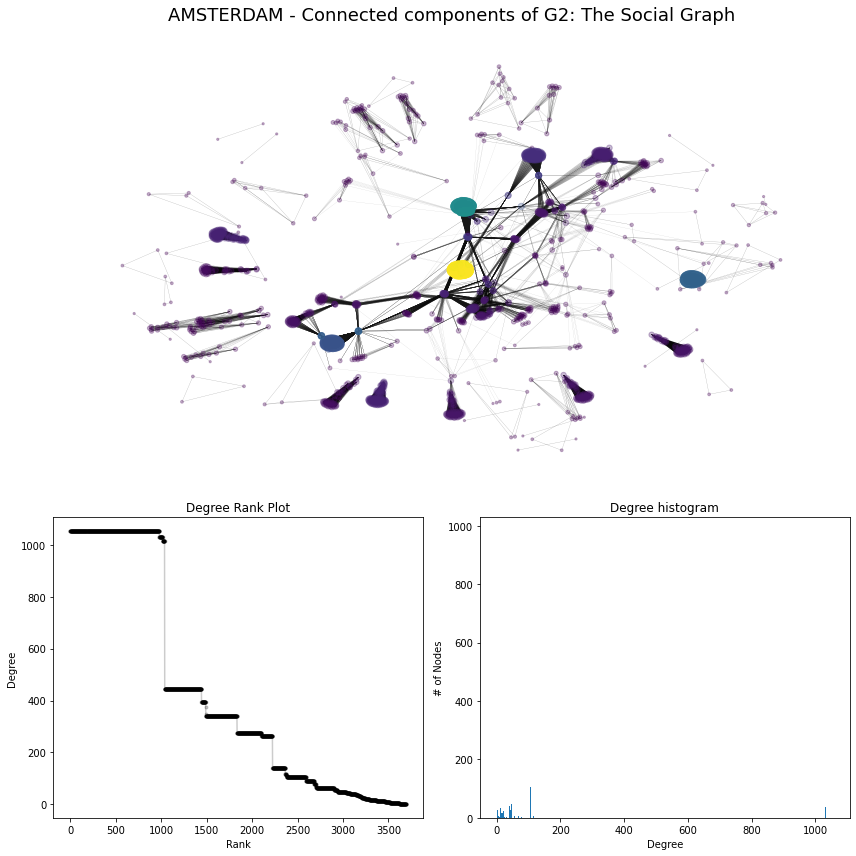

In [172]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G2.subgraph(sorted(nx.connected_components(G2), key=len, reverse=True)[0])
Gcc = G2
pos_2 = nx.spring_layout(G2, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Social_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of G2: The Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

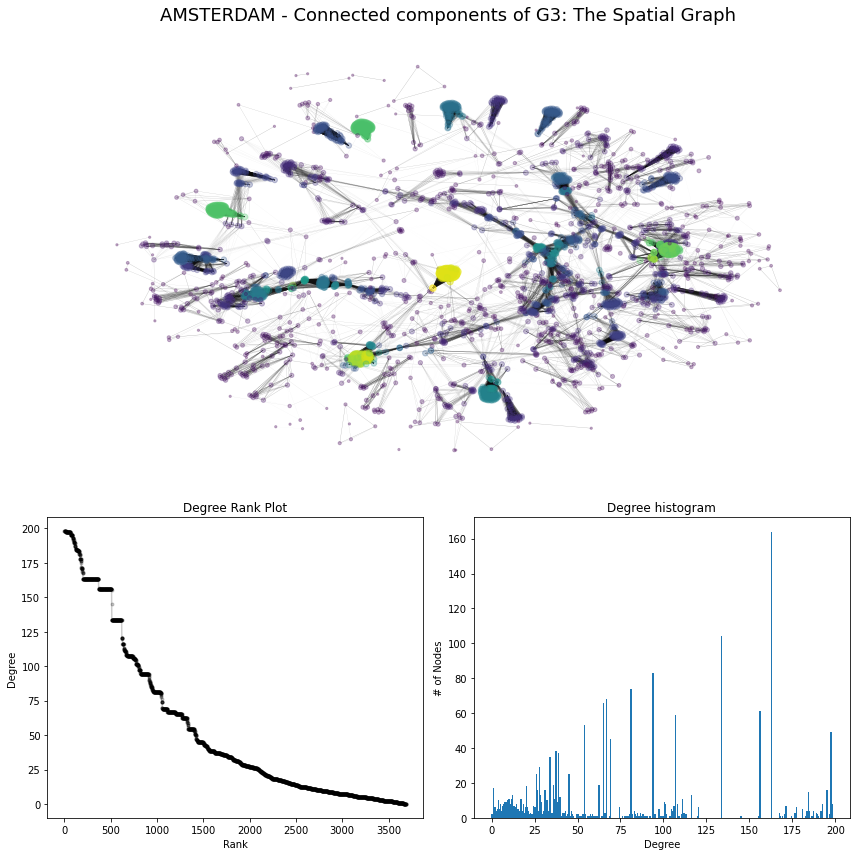

In [173]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G3.subgraph(sorted(nx.connected_components(G3), key=len, reverse=True)[0])
Gcc = G3
pos_2 = nx.spring_layout(G3, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Spatial_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of G3: The Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [174]:
GM = nx.MultiGraph()

In [175]:
GM.add_weighted_edges_from([e for e in G1.edges(data=True)])
GM.add_weighted_edges_from([e for e in G2.edges(data=True)])
GM.add_weighted_edges_from([e for e in G3.edges(data=True)])

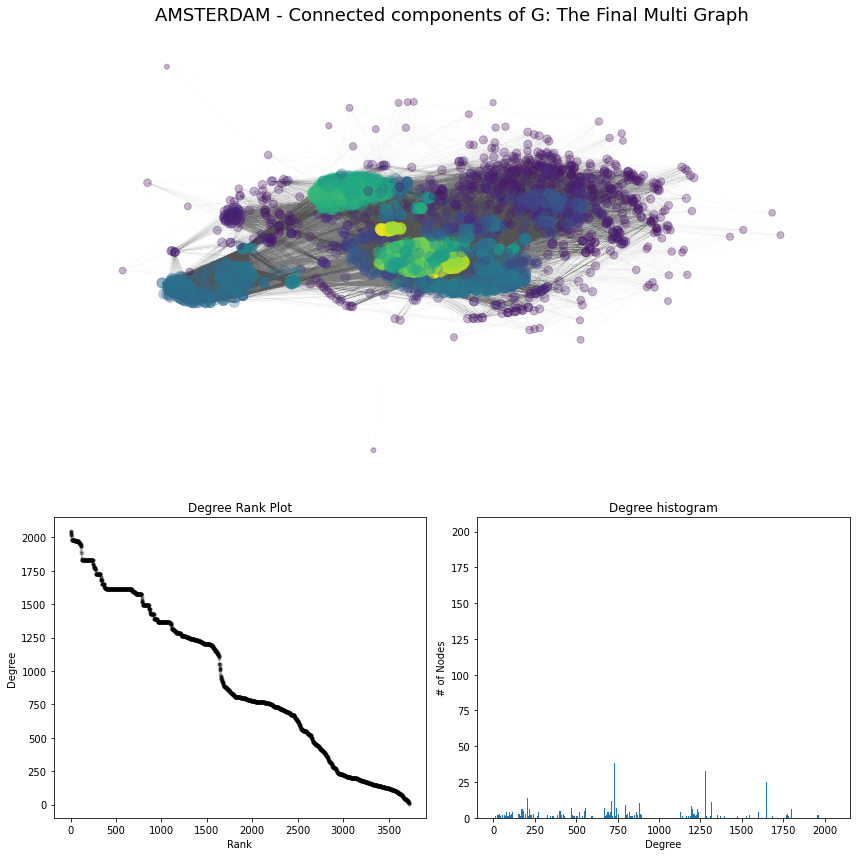

In [176]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in GM.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = GM.subgraph(sorted(nx.connected_components(GM), key=len, reverse=True)[0])
Gcc = GM
pos_2 = nx.spring_layout(G, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.03, width = [0.1*len(e) for e in Gcc.edges(data=True)])
ax0.set_title("AMSTERDAM - Connected components of G: The Final Multi Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [177]:
len(GM.nodes)

3727

In [178]:
len(GM.edges)

1716241

In [179]:
nx.density(GM)

0.24717584365356401

In [180]:
nx.is_connected(GM)

True

In [181]:
nx.is_weighted(GM)

True

In [182]:
nx.is_weighted(G2)

False

In [183]:
A1 = nx.adjacency_matrix(G1, weight='Temporal_Similarity')
A2 = nx.adjacency_matrix(G2, weight='Social_Similarity')
A3 = nx.adjacency_matrix(G3, weight='Spatial_Similarity')